# Iris dataset

## Importing required libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Loading the dataset

In [3]:
iris_df = pd.read_csv('Iris.csv')
iris_df = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]

## Reading the dataset

In [4]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


No missing values in the dataset

In [6]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Visualizing the data

### Countplot of different species

<AxesSubplot:title={'center':'Species Count'}, xlabel='Species', ylabel='count'>

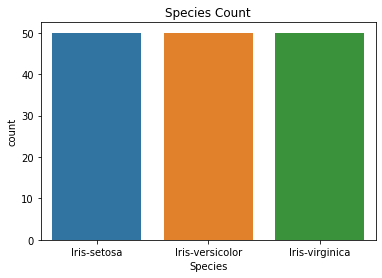

In [7]:
plt.title('Species Count')
plt.ylabel('Count')
sns.countplot(x=iris_df['Species'], data=iris_df)

### Scatterplot between sepal length and sepal width

<AxesSubplot:title={'center':'Comparison between sepal length and width based on species'}, xlabel='Sepal length in cm', ylabel='Sepal width in cm'>

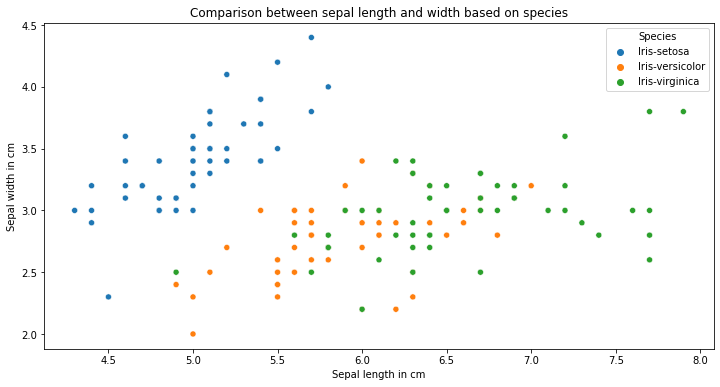

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Comparison between sepal length and width based on species')
plt.xlabel('Sepal length in cm')
plt.ylabel('Sepal width in cm')
sns.scatterplot(x=iris_df['SepalLengthCm'], y=iris_df['SepalWidthCm'], data=iris_df, hue=iris_df['Species'])

### Scatterplot between petal length and petal width

<AxesSubplot:title={'center':'Comparison between petal length and width based on species'}, xlabel='Petal length in cm', ylabel='Petal width in cm'>

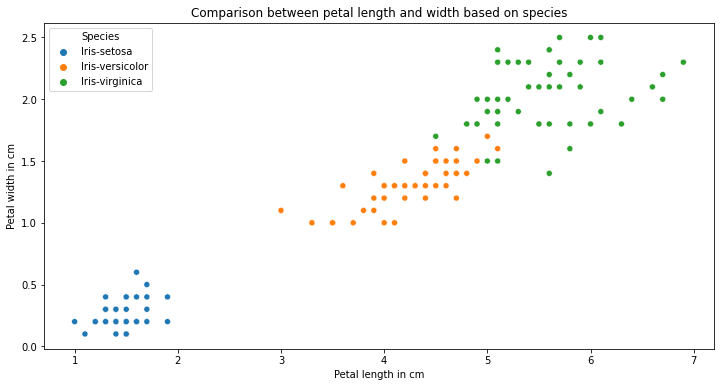

In [9]:
plt.figure(figsize=(12, 6))
plt.title('Comparison between petal length and width based on species')
plt.xlabel('Petal length in cm')
plt.ylabel('Petal width in cm')
sns.scatterplot(x=iris_df['PetalLengthCm'], y=iris_df['PetalWidthCm'], data=iris_df, hue=iris_df['Species'])

### Pairplot

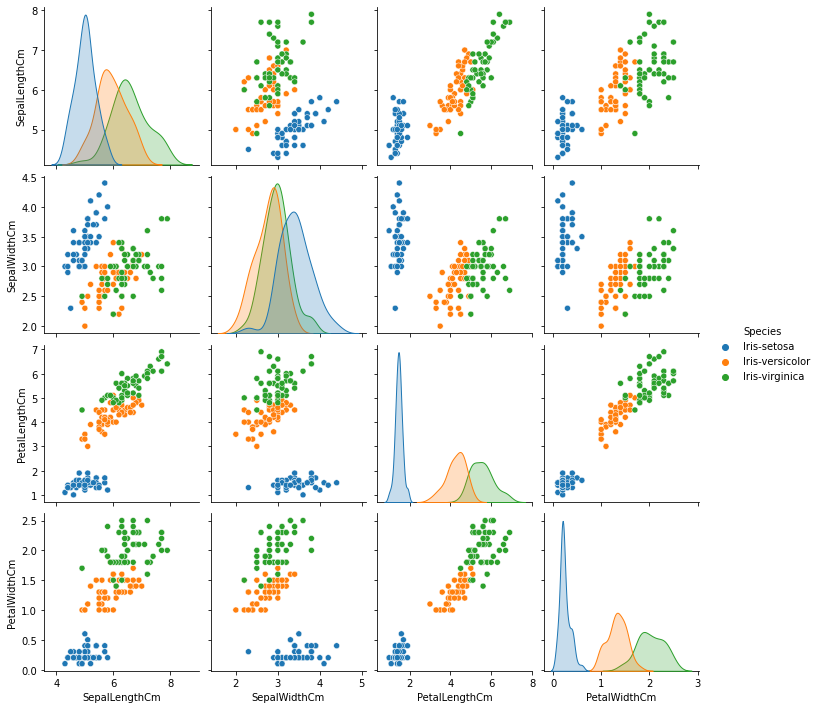

In [10]:
sns.pairplot(iris_df, hue='Species')

## Correlation between data fields

In [11]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Heatmap of the correlation

<AxesSubplot:>

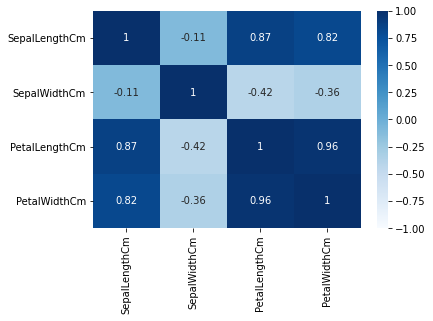

In [12]:
sns.heatmap(iris_df.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap='Blues')

Sepal length has a low negative correlation with the sepal width.
Petal length is highly correlated with petal width.

## Distributions plots

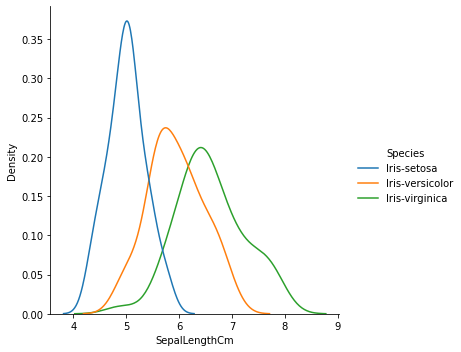

In [13]:
sns.displot(iris_df, x="SepalLengthCm", hue="Species", kind="kde")

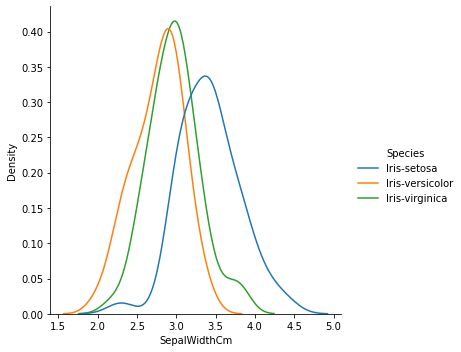

In [14]:
sns.displot(iris_df, x="SepalWidthCm", hue="Species", kind="kde")

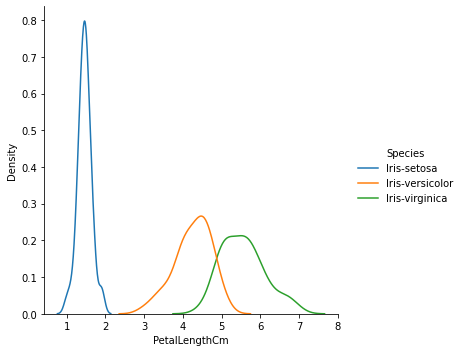

In [15]:
sns.displot(iris_df, x="PetalLengthCm", hue="Species", kind="kde")

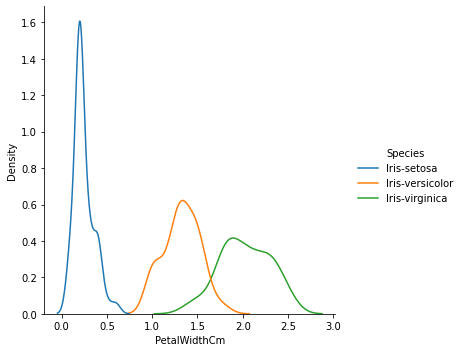

In [16]:
sns.displot(iris_df, x="PetalWidthCm", hue="Species", kind="kde")

Iris-setosa has shorter sepal length, petal length, and petal width than the other two species.

## Making a ML model

In [17]:
x = iris_df.drop('Species', 1)
y = iris_df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y)
clf = LogisticRegression(n_jobs=-1)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print("Accuracy of the model = %.2f%%" %(acc*100))

Accuracy of the model = 94.74%
